In [2]:
import pandas as pd

In [3]:
# !git clone https://github.com/wshuyi/demo-chinese-text-classification-lstm-keras.git

In [4]:
from pathlib import Path

In [5]:
mypath = Path(".")
# Path("demo-chinese-text-classification-lstm-keras")

In [6]:
df = pd.read_csv(mypath/'dianping.csv')

In [7]:
df.head()

,comment,sentiment
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,0
1,菜品丰富质量好，服务也不错！很喜欢！,1
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
comment      2000 non-null object
sentiment    2000 non-null int64
dtypes: int64(1), object(1)
memory usage: 31.3+ KB


In [9]:
# !pip install jieba

In [10]:
import jieba

In [11]:
df['text'] = df.comment.apply(lambda x: " ".join(jieba.cut(x)))

Building prefix dict from the default dictionary ...
I1014 22:07:54.566507 13708 __init__.py:111] Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\LIJIAX~1\AppData\Local\Temp\jieba.cache
I1014 22:07:54.569507 13708 __init__.py:131] Loading model from cache C:\Users\LIJIAX~1\AppData\Local\Temp\jieba.cache
Loading model cost 0.727 seconds.
I1014 22:07:55.294507 13708 __init__.py:163] Loading model cost 0.727 seconds.
Prefix dict has been built succesfully.
I1014 22:07:55.296506 13708 __init__.py:164] Prefix dict has been built succesfully.


In [12]:
df.head()

,comment,sentiment,text
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,0,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...
1,菜品丰富质量好，服务也不错！很喜欢！,1,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,0,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,1,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,1,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...


In [13]:
df = df[['text', 'sentiment']]

In [14]:
df.head()

,text,sentiment
0,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...,0
1,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！,1
2,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！,0
3,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...,1
4,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,1


In [15]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

In [16]:
maxlen = 100
max_words = 10000

In [17]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df.text)
sequences = tokenizer.texts_to_sequences(df.text)

In [20]:
type(sequences)

list

In [26]:
len(sequences)
len(sequences[0])

150

In [32]:
len(sequences[:1][0])

150

In [34]:
[len(sequence) for sequence in sequences[:5]]

[150, 12, 16, 57, 253]

In [36]:
data = pad_sequences(sequences, maxlen=maxlen, value = 0.0)

长句子被剪裁(`maxlen`)，短句子被 0 padding

In [38]:
print(data.shape)
print(maxlen)

(2000, 100)
100


In [39]:
word_index = tokenizer.word_index

In [40]:
type(word_index)

dict

In [51]:
[str(key)+": "+str(value) for key, value in word_index.items()][:5]

['，: 1', '的: 2', '了: 3', '。: 4', '\xa0: 5']

In [52]:
labels = np.array(df.sentiment)

In [54]:
labels[:5]

array([0, 1, 0, 1, 1], dtype=int64)

In [55]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [56]:
training_samples = int(len(indices) * .8)
validation_samples = len(indices) - training_samples

In [57]:
training_samples

1600

In [58]:
validation_samples

400

In [59]:
X_train = data[:training_samples]
y_train = labels[:training_samples]
X_valid = data[training_samples: training_samples + validation_samples]
y_valid = labels[training_samples: training_samples + validation_samples]

In [66]:
X_train[:5,:5]

array([[0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0]])

In [64]:
# !pip install gensim

In [67]:
from gensim.models import KeyedVectors

In [72]:
# myzip = mypath / 'zh.zip'

In [70]:
# !unzip $myzip

In [73]:
zh_model = KeyedVectors.load_word2vec_format('zh.vec')

In [75]:
zh_model.vectors.shape

(50102, 300)

In [77]:
zh_model.vectors[0].shape

(300,)

In [79]:
list(iter(zh_model.vocab))[:5]

['的', '</s>', '在', '是', '年']

In [81]:
embedding_dim = len(zh_model[next(iter(zh_model.vocab))])

In [82]:
embedding_dim

300

In [112]:
print('最大值: ',zh_model.vectors.max())
print('最小值: ',zh_model.vectors.min())

最大值:  1.8878
最小值:  -2.1188


In [115]:
embedding_matrix = np.random.uniform(zh_model.vectors.min(), zh_model.vectors.max(), [max_words, embedding_dim])

随机数参考 https://stackoverflow.com/questions/11873741/sampling-random-floats-on-a-range-in-numpy

In [117]:
embedding_matrix = (embedding_matrix - 0.5) * 2

In [118]:
zh_model.get_vector("的").shape

(300,)

In [119]:
zh_model.get_vector("李").shape

(300,)

In [120]:
for word, i in word_index.items():
    if i < max_words:
        try:
          embedding_vector = zh_model.get_vector(word)
          embedding_matrix[i] = embedding_vector
        except:
          pass # 如果无法获得对应的词向量，我们就干脆跳过，使用默认的随机向量。

这也是为什么，我们前面尽量把二者的分布调整成一致。

In [94]:
embedding_matrix.shape

(10000, 300)

In [95]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense, LSTM

units = 32

model = Sequential()
model.add(Embedding(max_words, embedding_dim))
model.add(LSTM(units))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 300)         3000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                42624     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 3,042,657
Trainable params: 3,042,657
Non-trainable params: 0
_________________________________________________________________


In [96]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False # 不跑，用预训练模型。

In [97]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
# 有监督的学习
model.save("sentiment_model.h5")

Train on 1600 samples, validate on 400 samples
Epoch 1/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.6472 - acc: 0.6363 - val_loss: 0.6054 - val_acc: 0.7000
Epoch 2/10
1600/1600 [==============================] - 2s 1ms/step - loss: 0.5325 - acc: 0.7419 - val_loss: 0.5664 - val_acc: 0.7100
Epoch 3/10
1600/1600 [==============================] - 2s 976us/step - loss: 0.4469 - acc: 0.7944 - val_loss: 0.4450 - val_acc: 0.7975
Epoch 4/10
1600/1600 [==============================] - 2s 981us/step - loss: 0.3874 - acc: 0.8275 - val_loss: 0.4323 - val_acc: 0.8200
Epoch 5/10
1600/1600 [==============================] - 2s 952us/step - loss: 0.3486 - acc: 0.8481 - val_loss: 0.4419 - val_acc: 0.8050
Epoch 6/10
1600/1600 [==============================] - 1s 913us/step - loss: 0.3062 - acc: 0.8775 - val_loss: 0.4097 - val_acc: 0.8225
Epoch 7/10
1600/1600 [==============================] - 1s 934us/step - loss: 0.2694 - acc: 0.8938 - val_loss: 0.4075 - val_acc: 0.8250
Epoch

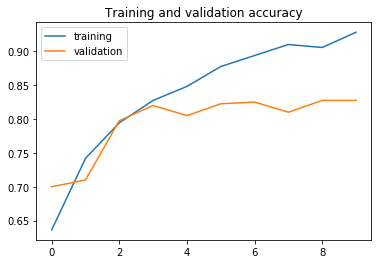

In [108]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training', 'validation'], loc='upper left')
plt.title('Training and validation accuracy')
plt.show()

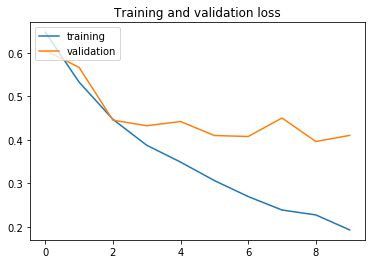

In [109]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training', 'validation'], loc='upper left')
plt.title('Training and validation loss')
plt.show()